In [1]:
import tifffile as tf 
import zarr 
import umap
# import palom
# import pillow
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xgboost as xgb 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import shap
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json
import numpy as np
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import xgboost as xgb
from scipy.spatial import ConvexHull, Delaunay

In [2]:
df = pd.read_parquet('/Users/swarchol/Downloads/exemplar-001/updated_hybrid.parquet')
feature_columns = ['DNA_6', 'ELANE', 'CD57', 'CD45', 'DNA_7', 'CD11B', 'SMA',
       'CD16', 'DNA_8', 'ECAD', 'FOXP3', 'NCAM',]

embedding_columns = ['UMAP_X', 'UMAP_Y']
y = df[embedding_columns].to_numpy()
x = df[feature_columns].to_numpy()

y[:,0] = y[:,0] / y[:,0].max()
y[:,1] = y[:,1] / y[:,1].max()


In [3]:
df.columns

Index(['CellID', 'DNA_6', 'ELANE', 'CD57', 'CD45', 'DNA_7', 'CD11B', 'SMA',
       'CD16', 'DNA_8', 'ECAD', 'FOXP3', 'NCAM', 'X_centroid', 'Y_centroid',
       'Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'Solidity', 'Extent', 'Orientation', 'cluster', 'UMAP_X', 'UMAP_Y'],
      dtype='object')

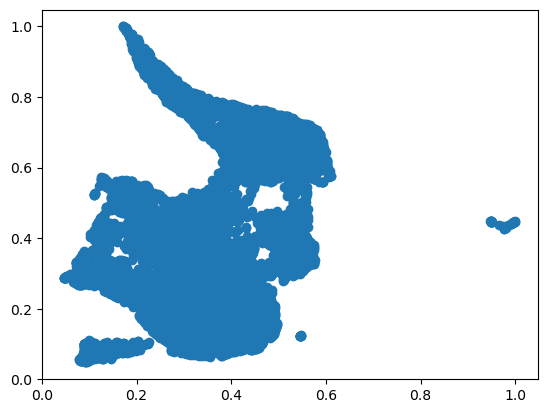

In [4]:

# %%
# make a scatter plot of y
plt.scatter(y[:,0], y[:,1])
plt.show()
# %%

In [5]:
regressor = xgb.XGBRegressor(
                 n_estimators=100,
                 max_depth=8)

regressor.fit(x, y)

# 

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=8,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

100%|██████████| 10/10 [01:21<00:00,  8.15s/it]


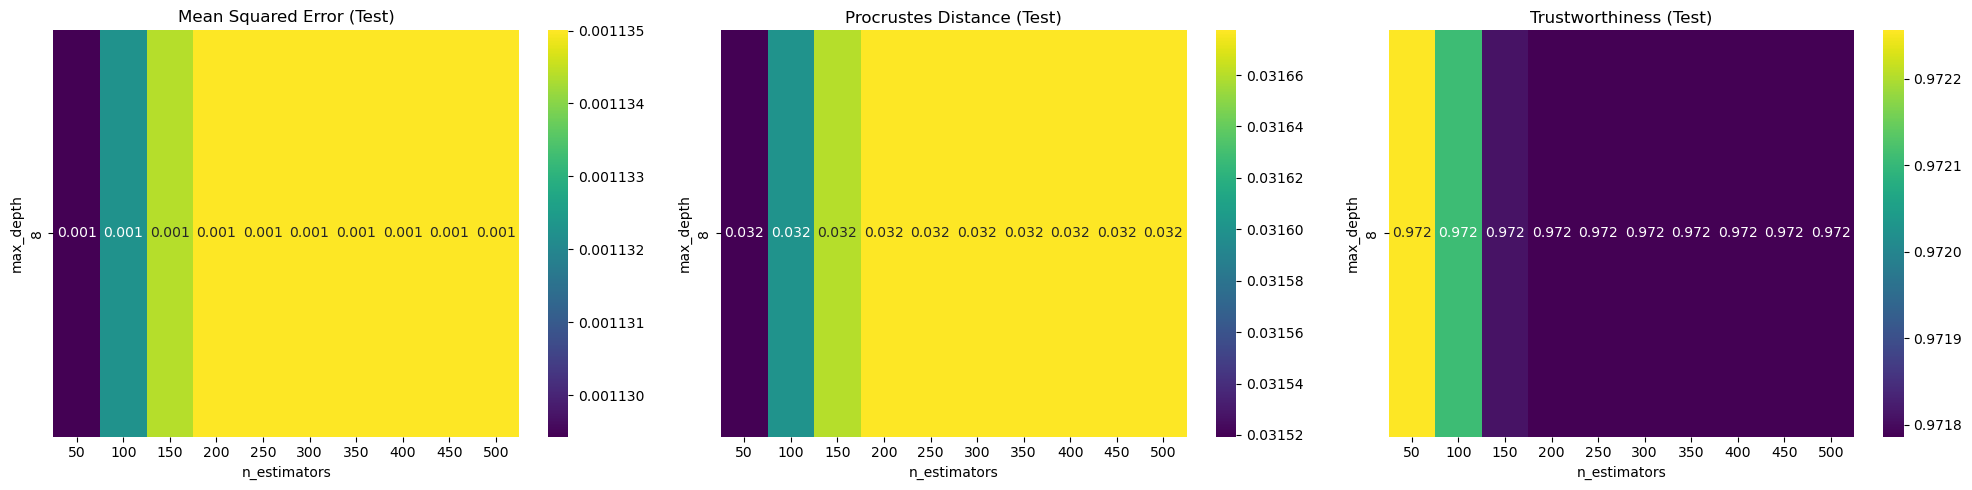

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.manifold import trustworthiness
from scipy.spatial import procrustes
import xgboost as xgb
from tqdm import tqdm

df = pd.read_parquet('/Users/swarchol/Downloads/exemplar-001/updated_hybrid.parquet')
feature_columns = ['DNA_6', 'ELANE', 'CD57', 'CD45', 'DNA_7', 'CD11B', 'SMA',
       'CD16', 'DNA_8', 'ECAD', 'FOXP3', 'NCAM',]

embedding_columns = ['UMAP_X', 'UMAP_Y']
y = df[embedding_columns].to_numpy()
x = df[feature_columns].to_numpy()

y[:,0] = y[:,0] / y[:,0].max()
y[:,1] = y[:,1] / y[:,1].max()

# Split data
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Parameter grid
n_estimators_grid = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
max_depth_grid = [8]

results = []

# Grid search
for n_estimators in tqdm(n_estimators_grid):
    for max_depth in max_depth_grid:
        regressor = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth)
        regressor.fit(X_train, y_train)
        
        y_pred_train = regressor.predict(X_train)
        y_pred_test = regressor.predict(X_test)

        mse_train = mean_squared_error(y_train, y_pred_train)
        mse_test = mean_squared_error(y_test, y_pred_test)

        _, _, procrustes_dist_train = procrustes(y_train, y_pred_train)
        _, _, procrustes_dist_test = procrustes(y_test, y_pred_test)


        trust_train = trustworthiness(y_train, y_pred_train, n_neighbors=10)
        trust_test = trustworthiness(y_test, y_pred_test, n_neighbors=10)

        results.append({
            'n_estimators': n_estimators,
            'max_depth': max_depth,
            'mse_train': mse_train,
            'mse_test': mse_test,
            'procrustes_train': procrustes_dist_train,
            'procrustes_test': procrustes_dist_test,
            'trust_train': trust_train,
            'trust_test': trust_test
        })

# Convert results to DataFrame
import pandas as pd
results_df = pd.DataFrame(results)

# Visualize results
fig, axes = plt.subplots(1, 3, figsize=(20, 5))

metrics = ['mse_test', 'procrustes_test', 'trust_test']
titles = ['Mean Squared Error (Test)', 'Procrustes Distance (Test)', 'Trustworthiness (Test)']

for ax, metric, title in zip(axes, metrics, titles):
    pivot = results_df.pivot_table(index='max_depth', columns='n_estimators', values=metric, aggfunc='mean')
    sns.heatmap(pivot, annot=True, fmt='.3f', cmap='viridis', ax=ax)
    ax.set_title(title)

plt.tight_layout()
plt.show()

100%|██████████| 3/3 [00:14<00:00,  4.88s/it]


IndexError: list index out of range

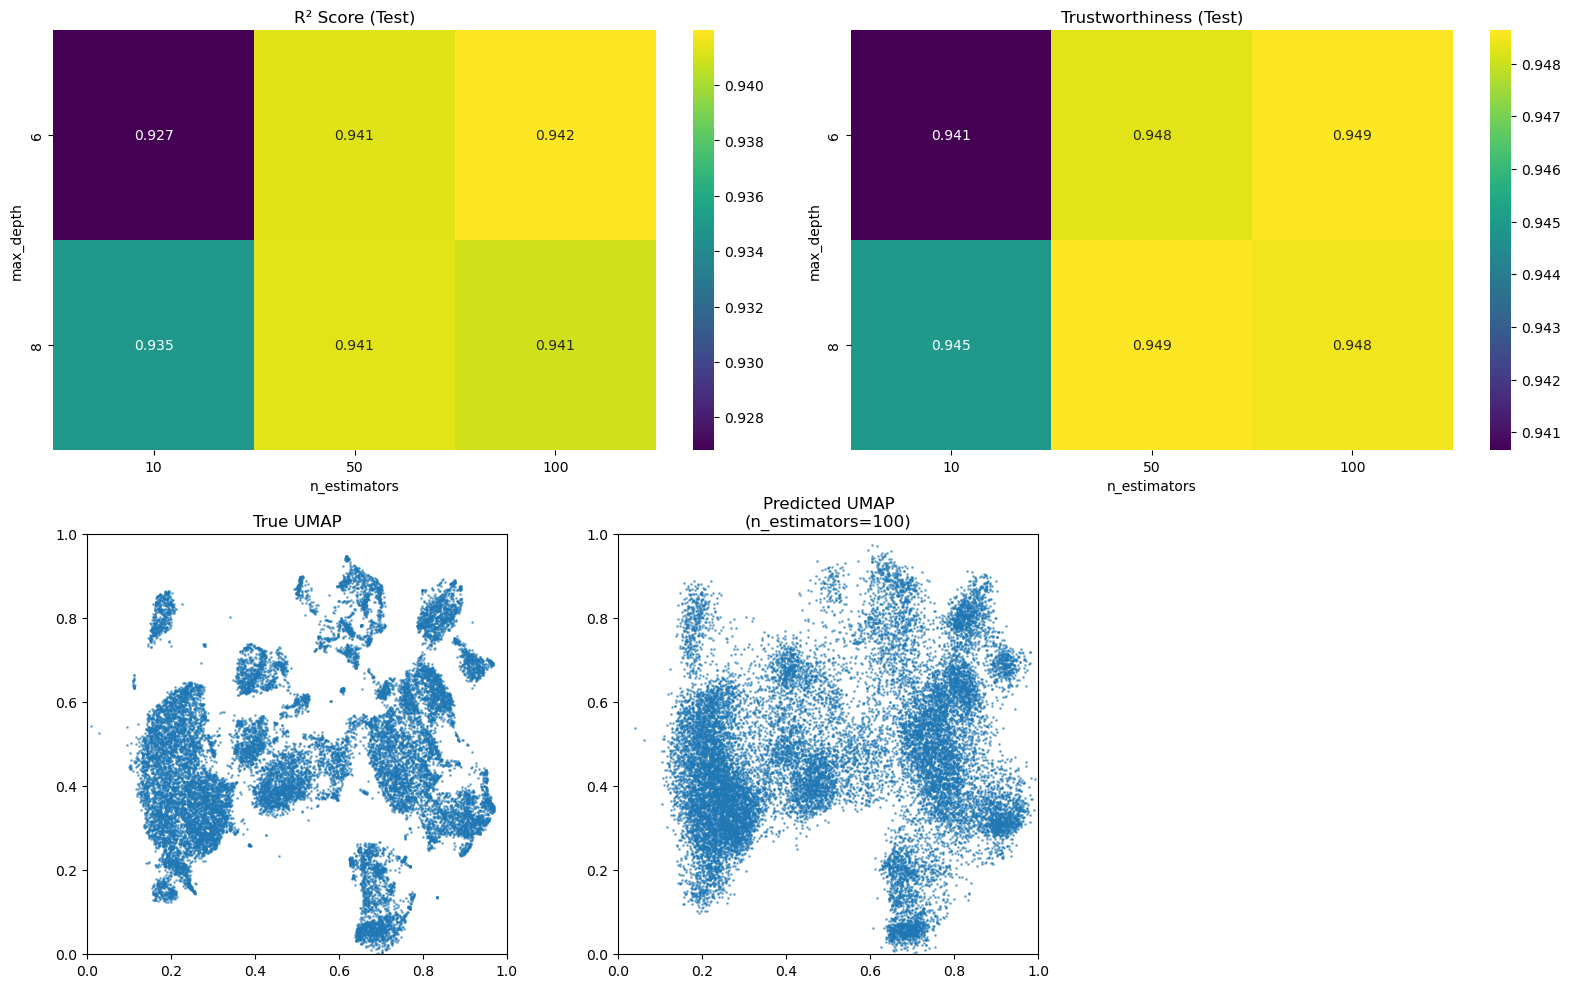

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.manifold import trustworthiness
import xgboost as xgb
from tqdm import tqdm

df = pd.read_parquet("/Users/swarchol/Downloads/df.parquet")
feature_columns = [
    "DNA",
    "DNA (2)",
    "DNA (3)",
    "CD3",
    "CD45RO",
    "DNA (4)",
    "Pan-cytokeratin",
    "Aortic smooth muscle actin",
    "DNA (5)",
    "CD4",
    "CD45",
    "PD-1",
    "DNA (6)",
    "CD20",
    "CD68",
    "CD8a",
    "DNA (7)",
    "CD163",
    "FOXP3",
    "PD-L1",
    "DNA (8)",
    "E-cadherin",
    "Vimentin",
    "CDX-2",
    "DNA (9)",
    "Lamin-A/B/C",
    "Desmin",
    "CD31",
    "DNA (10)",
    "PCNA",
    "Collagen",
]

embedding_columns = ["UMAP_X", "UMAP_Y"]
y = df[embedding_columns].to_numpy()
x = df[feature_columns].to_numpy()

y[:, 0] = y[:, 0] / y[:, 0].max()
y[:, 1] = y[:, 1] / y[:, 1].max()

# take a random 10% of the data
random_indices = np.random.rand(x.shape[0]) < 0.03
x = x[random_indices]
y = y[random_indices]

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

# Parameter grid
n_estimators_grid = [10, 50, 100]
max_depth_grid = [6, 8]

results = []
predictions = []  # Store predictions for plotting

# Grid search
for n_estimators in tqdm(n_estimators_grid):
    for max_depth in max_depth_grid:
        regressor = xgb.XGBRegressor(n_estimators=n_estimators, max_depth=max_depth)
        regressor.fit(X_train, y_train)

        y_pred_train = regressor.predict(X_train)
        y_pred_test = regressor.predict(X_test)

        # Store predictions
        predictions.append(
            {
                "n_estimators": n_estimators,
                "y_pred_train": y_pred_train,
                "y_pred_test": y_pred_test,
            }
        )

        # Calculate R² for both coordinates
        r2_x_test = r2_score(y_test[:, 0], y_pred_test[:, 0])
        r2_y_test = r2_score(y_test[:, 1], y_pred_test[:, 1])
        r2_test = (r2_x_test + r2_y_test) / 2  # Average R² across coordinates

        trust_test = trustworthiness(y_test, y_pred_test, n_neighbors=10)

        results.append(
            {
                "n_estimators": n_estimators,
                "max_depth": max_depth,
                "r2_test": r2_test,
                "trust_test": trust_test,
            }
        )

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Create figure with two rows
fig = plt.figure(figsize=(20, 12))

# Create GridSpec
gs = plt.GridSpec(2, 6, figure=fig)

# Plot heatmaps in the first row
metrics = ["r2_test", "trust_test"]
titles = ["R² Score (Test)", "Trustworthiness (Test)"]

for i, (metric, title) in enumerate(zip(metrics, titles)):
    ax = fig.add_subplot(gs[0, i * 3 : (i + 1) * 3])
    pivot = results_df.pivot_table(
        index="max_depth", columns="n_estimators", values=metric, aggfunc="mean"
    )
    sns.heatmap(pivot, annot=True, fmt=".3f", cmap="viridis", ax=ax)
    ax.set_title(title)

# Plot scatterplots in the second row
# Create equal width subplots
plot_indices = [0, 4, 9]  # Plot first, middle, and last model
for i, idx in enumerate(plot_indices):
    if i == 0:
        # First, plot the true training data
        ax = fig.add_subplot(gs[1, 0:2])
        ax.scatter(y_train[:, 0], y_train[:, 1], alpha=0.5, s=1)
        ax.set_title("True UMAP")
    else:
        pred = predictions[idx]
        ax = fig.add_subplot(gs[1, (i * 2) : ((i + 1) * 2)])
        ax.scatter(
            pred["y_pred_train"][:, 0], pred["y_pred_train"][:, 1], alpha=0.5, s=1
        )
        ax.set_title(f'Predicted UMAP\n(n_estimators={pred["n_estimators"]})')

    # Set equal aspect ratio and limits
    ax.set_aspect("equal")
    ax.set_xlim(0, 1)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()

# Print best model based on trustworthiness
best_model = results_df.loc[results_df["trust_test"].idxmax()]
print("\nBest model parameters:")
print(f"n_estimators: {best_model['n_estimators']}")
print(f"max_depth: {best_model['max_depth']}")
print(f"Test R²: {best_model['r2_test']:.3f}")
print(f"Test trustworthiness: {best_model['trust_test']:.3f}")
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
test = pd.read_csv('/Users/swarchol/Downloads/df.csv')


In [6]:
# save as parquet
import pandas as pd
test = pd.read_csv('/Users/swarchol/Downloads/df.csv')
test.to_parquet('/Users/swarchol/Downloads/df.parquet')